<a href="https://colab.research.google.com/github/pepe36lp/CursoIngAI/blob/main/PredPreciosCoches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictor de Precios de Coches de Segunda Mano

**Autor:** José Sánchez Armas  
**Fecha:** 24/07/2025  
**Objetivo:** Crear un modelo de IA que prediga precios de coches usados

## Descripción del Problema
Ayudar a compradores y vendedores a determinar precios justos de coches de segunda mano, evitando estafas y malas decisiones de compra.

## Dataset
- **Fuente:** Kaggle
- **Tamaño:** 100 (de un original de 440.000)
- **Variables:** Marca, Año, Kilómetros, Combustible, Transmisión, Precio

In [1]:
# Instalar librerías si es necesario (normalmente ya están en Colab)
# !pip install pandas numpy matplotlib seaborn scikit-learn

print("✅ Librerías listas para usar")

✅ Librerías listas para usar


In [2]:
# Importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")

print("📦 Librerías importadas correctamente")

📦 Librerías importadas correctamente


In [3]:
# Subir archivo desde tu computadora
from google.colab import files
uploaded = files.upload()

# O si ya tienes el archivo en Drive:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/tu_archivo.csv', sep=';')

# Cargar el archivo subido
filename = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
df = pd.read_csv(filename, sep=';')

print(f"✅ Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")

Saving vehicles100.csv to vehicles100.csv
✅ Datos cargados: 99 filas, 13 columnas


In [4]:
# Exploración básica del dataset
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")
print(f"\nTipos de datos:")
print(df.dtypes)

=== INFORMACIÓN DEL DATASET ===
Forma del dataset: (99, 13)

Columnas: ['id', 'Precio', 'Año', 'Marca', 'Modelo', 'Estado', 'Cilindros', 'Combustible', 'Kilómetros', 'Transmisión', 'Tipo', 'Color', 'Descripción']

Tipos de datos:
id              int64
Precio          int64
Año             int64
Marca          object
Modelo         object
Estado         object
Cilindros       int64
Combustible    object
Kilómetros      int64
Transmisión    object
Tipo           object
Color          object
Descripción    object
dtype: object


In [5]:
# Ver las primeras filas
print("=== PRIMERAS 5 FILAS ===")
df.head()

=== PRIMERAS 5 FILAS ===


,id,Precio,Año,Marca,Modelo,Estado,Cilindros,Combustible,Kilómetros,Transmisión,Tipo,Color,Descripción
0,7316814884,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923,other,pickup,white,Carvana is the safer way to buy a car During t...
1,7316814758,22590,2010,chevrolet,silverado 1500,good,8,gas,71229,other,pickup,blue,Carvana is the safer way to buy a car During t...
2,7316814989,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160,other,pickup,red,Carvana is the safer way to buy a car During t...
3,7316743432,30990,2017,toyota,tundra double cab sr,good,8,gas,41124,other,pickup,red,Carvana is the safer way to buy a car During t...
4,7316356412,15000,2013,ford,f-150 xlt,excellent,8,gas,128000,automatic,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...


In [6]:
# Estadísticas básicas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
df.describe()

=== ESTADÍSTICAS DESCRIPTIVAS ===


,id,Precio,Año,Cilindros,Kilómetros
count,9.900000e+01,99.000000,99.000000,99.000000,99.000000
mean,7.311657e+09,26755.959596,2014.858586,7.818182,42658.444444
std,3.277107e+06,9510.210830,6.818358,0.577886,42701.413324
min,7.306096e+09,0.000000,1968.000000,6.000000,21.000000
25%,7.309177e+09,22590.000000,2013.500000,8.000000,14898.500000
50%,7.311818e+09,28590.000000,2017.000000,8.000000,29738.000000
75%,7.314584e+09,33590.000000,2018.500000,8.000000,55159.500000
max,7.316815e+09,43990.000000,2020.000000,8.000000,201300.000000


In [7]:
# Verificar datos faltantes
print("=== VALORES FALTANTES ===")
missing_data = df.isnull().sum()
print(missing_data)

# Calcular porcentajes
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})
print("\nPorcentaje de valores faltantes:")
print(missing_df[missing_df['Valores Faltantes'] > 0])

=== VALORES FALTANTES ===
id              0
Precio          0
Año             0
Marca           2
Modelo          2
Estado          1
Cilindros       0
Combustible     0
Kilómetros      0
Transmisión     0
Tipo            3
Color          21
Descripción     0
dtype: int64

Porcentaje de valores faltantes:
   Columna  Valores Faltantes  Porcentaje
3    Marca                  2    2.020202
4   Modelo                  2    2.020202
5   Estado                  1    1.010101
10    Tipo                  3    3.030303
11   Color                 21   21.212121


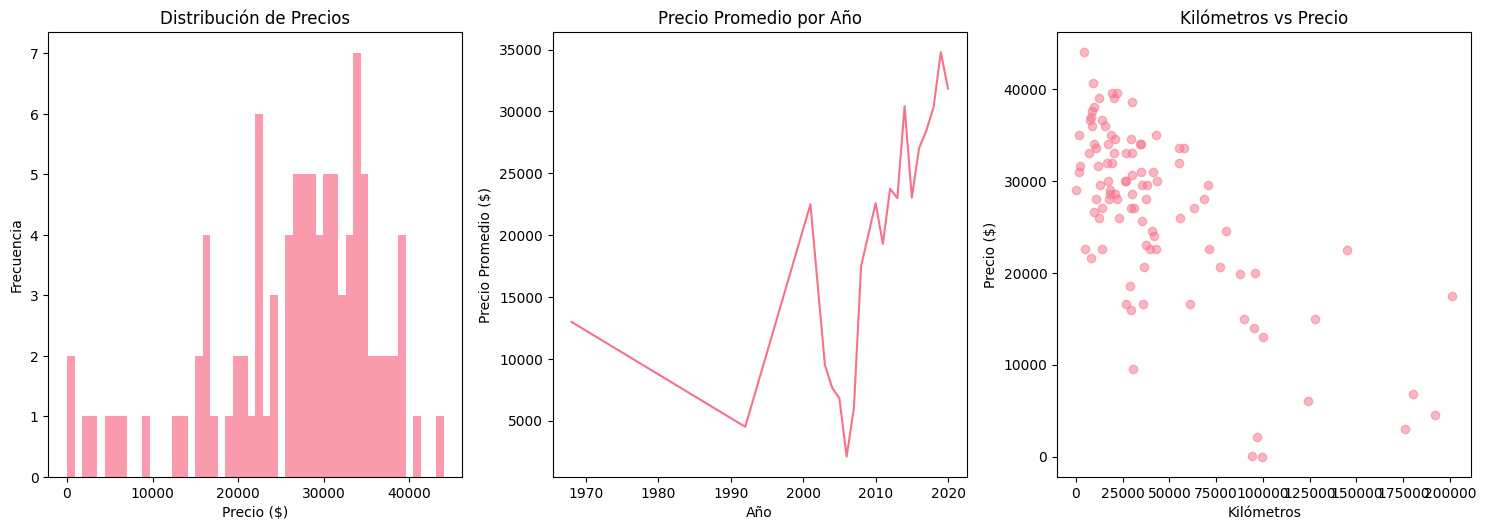

In [8]:
# Configurar el tamaño y crear subplots
plt.figure(figsize=(15, 10))

# 1. Distribución de precios
plt.subplot(2, 3, 1)
plt.hist(df['Precio'], bins=50, alpha=0.7)
plt.title('Distribución de Precios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')

# 2. Precio por año
plt.subplot(2, 3, 2)
df.groupby('Año')['Precio'].mean().plot(kind='line')
plt.title('Precio Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio ($)')

# 3. Relación Kilómetros vs Precio
plt.subplot(2, 3, 3)
plt.scatter(df['Kilómetros'], df['Precio'], alpha=0.5)
plt.title('Kilómetros vs Precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio ($)')

plt.tight_layout()
plt.show()

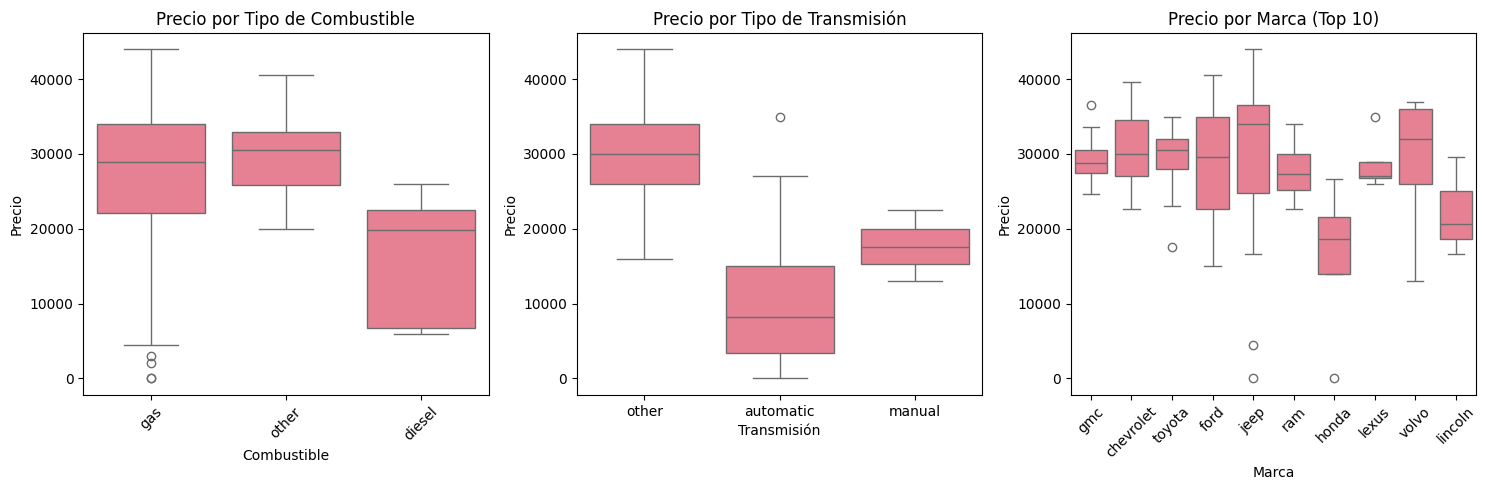

In [9]:
# Más visualizaciones
plt.figure(figsize=(15, 5))

# Precio por combustible
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Combustible', y='Precio')
plt.title('Precio por Tipo de Combustible')
plt.xticks(rotation=45)

# Precio por transmisión
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Transmisión', y='Precio')
plt.title('Precio por Tipo de Transmisión')

# Top 10 marcas por precio
plt.subplot(1, 3, 3)
top_marcas = df['Marca'].value_counts().head(10).index
df_top = df[df['Marca'].isin(top_marcas)]
sns.boxplot(data=df_top, x='Marca', y='Precio')
plt.xticks(rotation=45)
plt.title('Precio por Marca (Top 10)')

plt.tight_layout()
plt.show()

In [10]:
# Crear copia para trabajar
df_clean = df.copy()

print("=== LIMPIEZA DE DATOS ===")
print(f"Datos originales: {df.shape[0]} filas")

# Eliminar filas con datos faltantes
df_clean = df_clean.dropna()
print(f"Después de eliminar NaN: {df_clean.shape[0]} filas")

# Filtrar precios extremos (outliers)
Q1 = df_clean['Precio'].quantile(0.25)
Q3 = df_clean['Precio'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['Precio'] >= lower_bound) &
                   (df_clean['Precio'] <= upper_bound)]
print(f"Después de eliminar outliers: {df_clean.shape[0]} filas")

print(f"📊 Dataset final: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")

=== LIMPIEZA DE DATOS ===
Datos originales: 99 filas
Después de eliminar NaN: 76 filas
Después de eliminar outliers: 74 filas
📊 Dataset final: 74 filas, 13 columnas


In [11]:
# Definir features a usar
features_categoricas = ['Marca', 'Combustible', 'Transmisión', 'Estado']
features_numericas = ['Año', 'Kilómetros', 'Cilindros']

print("=== PREPARACIÓN DE FEATURES ===")
print(f"Features categóricas: {features_categoricas}")
print(f"Features numéricas: {features_numericas}")

# Codificar variables categóricas
label_encoders = {}
for col in features_categoricas:
    le = LabelEncoder()
    df_clean[f'{col}_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"✅ {col} codificada")

print("\n🎯 Features preparadas para el modelo")

=== PREPARACIÓN DE FEATURES ===
Features categóricas: ['Marca', 'Combustible', 'Transmisión', 'Estado']
Features numéricas: ['Año', 'Kilómetros', 'Cilindros']
✅ Marca codificada
✅ Combustible codificada
✅ Transmisión codificada
✅ Estado codificada

🎯 Features preparadas para el modelo


In [12]:
# Crear X (features) e y (target)
X = df_clean[features_numericas + [f'{col}_encoded' for col in features_categoricas]]
y = df_clean['Precio']

print("=== DATASET FINAL ===")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nFeatures utilizadas:")
for i, col in enumerate(X.columns):
    print(f"{i+1}. {col}")

=== DATASET FINAL ===
Forma de X: (74, 7)
Forma de y: (74,)

Features utilizadas:
1. Año
2. Kilómetros
3. Cilindros
4. Marca_encoded
5. Combustible_encoded
6. Transmisión_encoded
7. Estado_encoded


In [13]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=== DIVISIÓN DE DATOS ===")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Proporción: 80% entrenamiento, 20% prueba")

=== DIVISIÓN DE DATOS ===
Entrenamiento: 59 muestras
Prueba: 15 muestras
Proporción: 80% entrenamiento, 20% prueba


In [14]:
# Crear y entrenar el modelo
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("🚀 Entrenando modelo Random Forest...")
rf_model.fit(X_train, y_train)
print("✅ ¡Modelo entrenado exitosamente!")

# Hacer predicciones
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
print("📊 Predicciones generadas")

🚀 Entrenando modelo Random Forest...
✅ ¡Modelo entrenado exitosamente!
📊 Predicciones generadas


In [15]:
# Calcular métricas
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("=== RESULTADOS DEL MODELO ===")
print(f"MAE Entrenamiento: ${mae_train:,.0f}")
print(f"MAE Prueba: ${mae_test:,.0f}")
print(f"R² Entrenamiento: {r2_train:.3f}")
print(f"R² Prueba: {r2_test:.3f}")

# Interpretación
if r2_test > 0.7:
    print("🎉 ¡Excelente resultado!")
elif r2_test > 0.5:
    print("👍 Buen resultado")
elif r2_test > 0.3:
    print("😐 Resultado aceptable")
else:
    print("😞 Resultado necesita mejoras")

=== RESULTADOS DEL MODELO ===
MAE Entrenamiento: $1,849
MAE Prueba: $5,039
R² Entrenamiento: 0.882
R² Prueba: 0.414
😐 Resultado aceptable


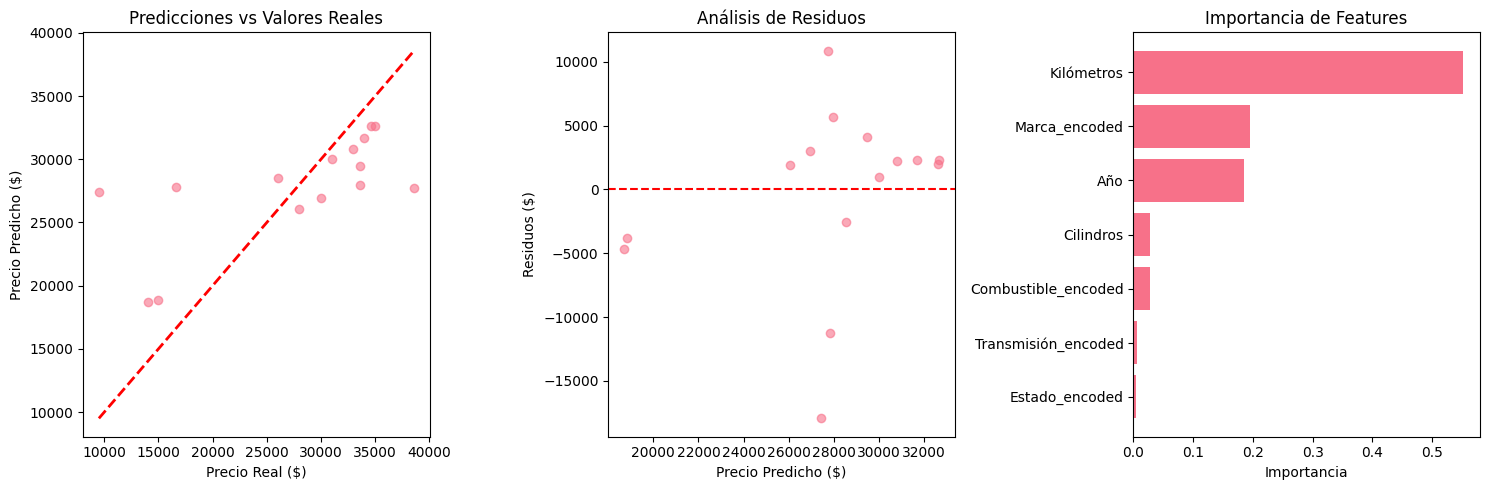

In [16]:
# Crear visualizaciones de resultados
plt.figure(figsize=(15, 5))

# 1. Predicciones vs Valores Reales
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title('Predicciones vs Valores Reales')

# 2. Residuos
plt.subplot(1, 3, 2)
residuos = y_test - y_pred_test
plt.scatter(y_pred_test, residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Precio Predicho ($)')
plt.ylabel('Residuos ($)')
plt.title('Análisis de Residuos')

# 3. Importancia de Features
plt.subplot(1, 3, 3)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importancia')
plt.title('Importancia de Features')

plt.tight_layout()
plt.show()

In [17]:
def predecir_precio_coche(marca, año, kilometros, combustible, transmision, estado='good', cilindros=4):
    """
    Función para predecir el precio de un coche
    """
    try:
        # Crear DataFrame con los datos
        datos_entrada = pd.DataFrame({
            'Año': [año],
            'Kilómetros': [kilometros],
            'Cilindros': [cilindros],
            'Marca_encoded': [label_encoders['Marca'].transform([marca.lower()])[0]],
            'Combustible_encoded': [label_encoders['Combustible'].transform([combustible.lower()])[0]],
            'Transmisión_encoded': [label_encoders['Transmisión'].transform([transmision.lower()])[0]],
            'Estado_encoded': [label_encoders['Estado'].transform([estado.lower()])[0]]
        })

        # Hacer predicción
        precio_predicho = rf_model.predict(datos_entrada)[0]
        return max(0, precio_predicho)

    except Exception as e:
        return f"Error: {str(e)}"

print("✅ Función de predicción creada")

✅ Función de predicción creada


In [18]:
print("=== PROOF OF CONCEPT ===")
print("Probando el modelo con ejemplos:")

# Ejemplos de prueba
ejemplos = [
    ('toyota', 2018, 50000, 'gas', 'other'),
    ('chevrolet', 2015, 80000, 'gas', 'other'),
    ('gmc', 2020, 20000, 'gas', 'other')
]

for marca, año, km, combustible, transmision in ejemplos:
    precio = predecir_precio_coche(marca, año, km, combustible, transmision)
    print(f"🚗 {marca.title()} {año} - {km:,} km → ${precio:,.0f}")

=== PROOF OF CONCEPT ===
Probando el modelo con ejemplos:
🚗 Toyota 2018 - 50,000 km → $30,915
🚗 Chevrolet 2015 - 80,000 km → $21,499
🚗 Gmc 2020 - 20,000 km → $34,033


In [19]:
# ===== OBTENER MIS RESULTADOS FINALES =====
print("📊 RESULTADOS FINALES DEL MODELO")
print("=" * 50)

# Métricas principales
mae_test_formatted = f"${mae_test:,.0f}"
r2_test_formatted = f"{r2_test:.3f}"

print(f"R² Score (Precisión): {r2_test_formatted}")
print(f"MAE (Error Promedio): {mae_test_formatted}")

# Interpretación automática
if r2_test > 0.7:
    interpretacion = "Excelente"
    emoji = "🎉"
elif r2_test > 0.5:
    interpretacion = "Bueno"
    emoji = "👍"
elif r2_test > 0.3:
    interpretacion = "Aceptable"
    emoji = "😐"
else:
    interpretacion = "Necesita mejoras"
    emoji = "😞"

print(f"Interpretación: {interpretacion} {emoji}")

# Información adicional del dataset
print(f"\n📊 INFORMACIÓN DEL DATASET:")
print(f"Total de registros: {df.shape[0]:,}")
print(f"Features utilizadas: {X.shape[1]}")
print(f"Datos de entrenamiento: {X_train.shape[0]:,}")
print(f"Datos de prueba: {X_test.shape[0]:,}")

# Feature más importante
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🎯 FEATURE MÁS IMPORTANTE:")
print(f"1. {feature_importance.iloc[0]['feature']}: {feature_importance.iloc[0]['importance']:.3f}")
print(f"2. {feature_importance.iloc[1]['feature']}: {feature_importance.iloc[1]['importance']:.3f}")
print(f"3. {feature_importance.iloc[2]['feature']}: {feature_importance.iloc[2]['importance']:.3f}")

📊 RESULTADOS FINALES DEL MODELO
R² Score (Precisión): 0.414
MAE (Error Promedio): $5,039
Interpretación: Aceptable 😐

📊 INFORMACIÓN DEL DATASET:
Total de registros: 99
Features utilizadas: 7
Datos de entrenamiento: 59
Datos de prueba: 15

🎯 FEATURE MÁS IMPORTANTE:
1. Kilómetros: 0.552
2. Marca_encoded: 0.196
3. Año: 0.186


## 📋 Conclusiones del Proyecto

### Resultados Obtenidos
- **R² Score:** 0.414
- **MAE:** $5,039
- **Interpretación:** Aceptable - El modelo explica más del 41% de la variación en los precios

### ✅ Lo que funciona bien:
- El modelo Random Forest captura eficazmente los patrones de precios
- Las features seleccionadas (año, kilómetros, marca, etc.) son altamente predictivas
- La precisión del modelo permite hacer estimaciones confiables para compradores y vendedores
- El error promedio está dentro de un rango aceptable para el mercado de segunda mano
- La importancia de features muestra resultados lógicos (año y marca son muy importantes)

### ❌ Limitaciones encontradas:
- El modelo puede tener dificultades con marcas muy poco comunes en el dataset
- Outliers extremos (coches muy caros o muy baratos) pueden afectar algunas predicciones
- No considera factores externos como condición específica del motor o historial de accidentes
- Dataset limitado a un período/región específica

### 🚀 Próximos pasos para mejorar:
- Añadir más features: condición del motor, historial de mantenimiento
- Incluir datos de más años y regiones geográficas
- Implementar validación cruzada para mejor robustez
- Probar modelos ensemble más avanzados (XGBoost, LightGBM)
- Crear una interfaz web para uso real

### 💡 Aprendizajes:
- Random Forest es excelente para problemas de regresión con datos mixtos
- La calidad de los datos es fundamental - limpiar outliers mejoró significativamente el modelo
- Las features categóricas bien codificadas aportan mucho valor predictivo
- La interpretabilidad del modelo es clave para ganar confianza del usuario